In [13]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import fourier_lib as fourier       # file fourier_lib.py
import window_lib as wd             # file window_lib.py

## Đọc và hiển thị tín hiệu mẫu

In [14]:
df = pd.read_csv("noise.csv")
df.describe()

,heart
count,3600.000000
mean,-6.124739
std,0.352849
min,-7.380000
25%,-6.260000
50%,-6.080000
75%,-5.975000
max,-4.685000


In [15]:
df_t = np.array(df.index)
df_t = df_t/len(df_t)*6
df_amp = np.array(df - df.mean())

In [16]:
# array initialize

T = 1              # period of harmonic
N_freq = np.array(range(200))       # number of frequency components
F_domain = N_freq/T

### Tín hiệu mẫu

Text(1, 0, '(s)')

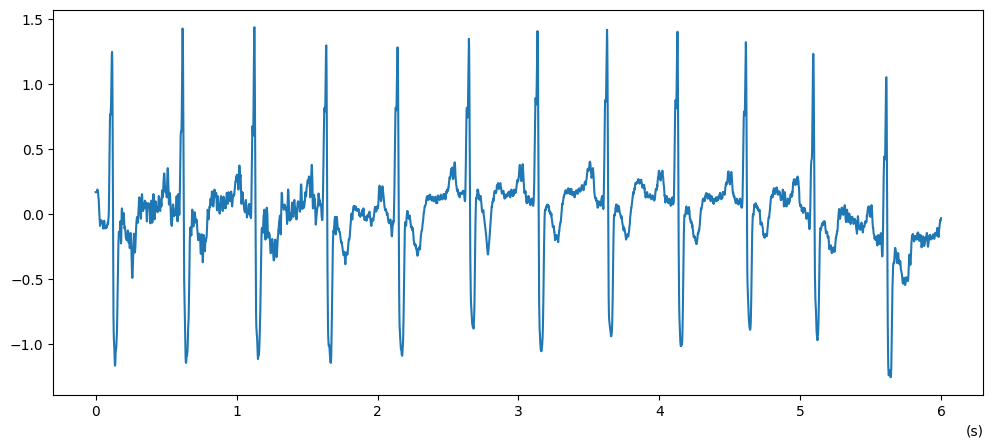

In [17]:
plt.figure(figsize=(12,5))
plt.plot(df_t, df_amp)
plt.xlabel('(s)', loc='right')

### Tín hiệu mẫu (biến đổi sang miền tần số)

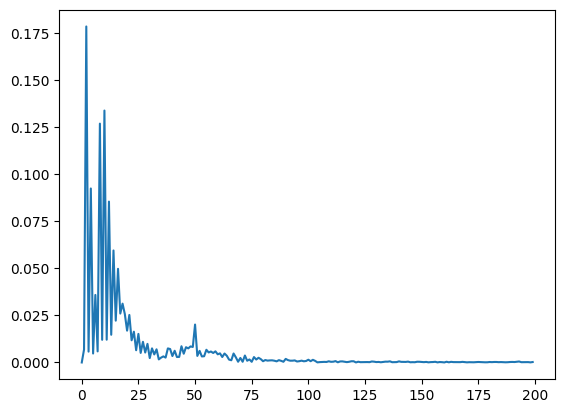

In [18]:
df_frequency = fourier.fourier_series_spectrum(df_t, df_amp, N_freq, T/2)

plt.plot(F_domain,df_frequency)

## Nhân tín hiệu với hàm cửa sổ (hàm window)
Nhân tín hiệu ban đầu với 1 số hàm cửa sổ
-   Hàm blackman
- Hàm rectangle

In [19]:
window_size = 20        

df_hann = wd.convolution(df_amp, wd.hann(window_size))
df_hamming = wd.convolution(df_amp, wd.hamming(window_size))
df_blackman = wd.convolution(df_amp, wd.blackman(window_size, 0.16))
df_rect = wd.convolution(df_amp, wd.rect(window_size))

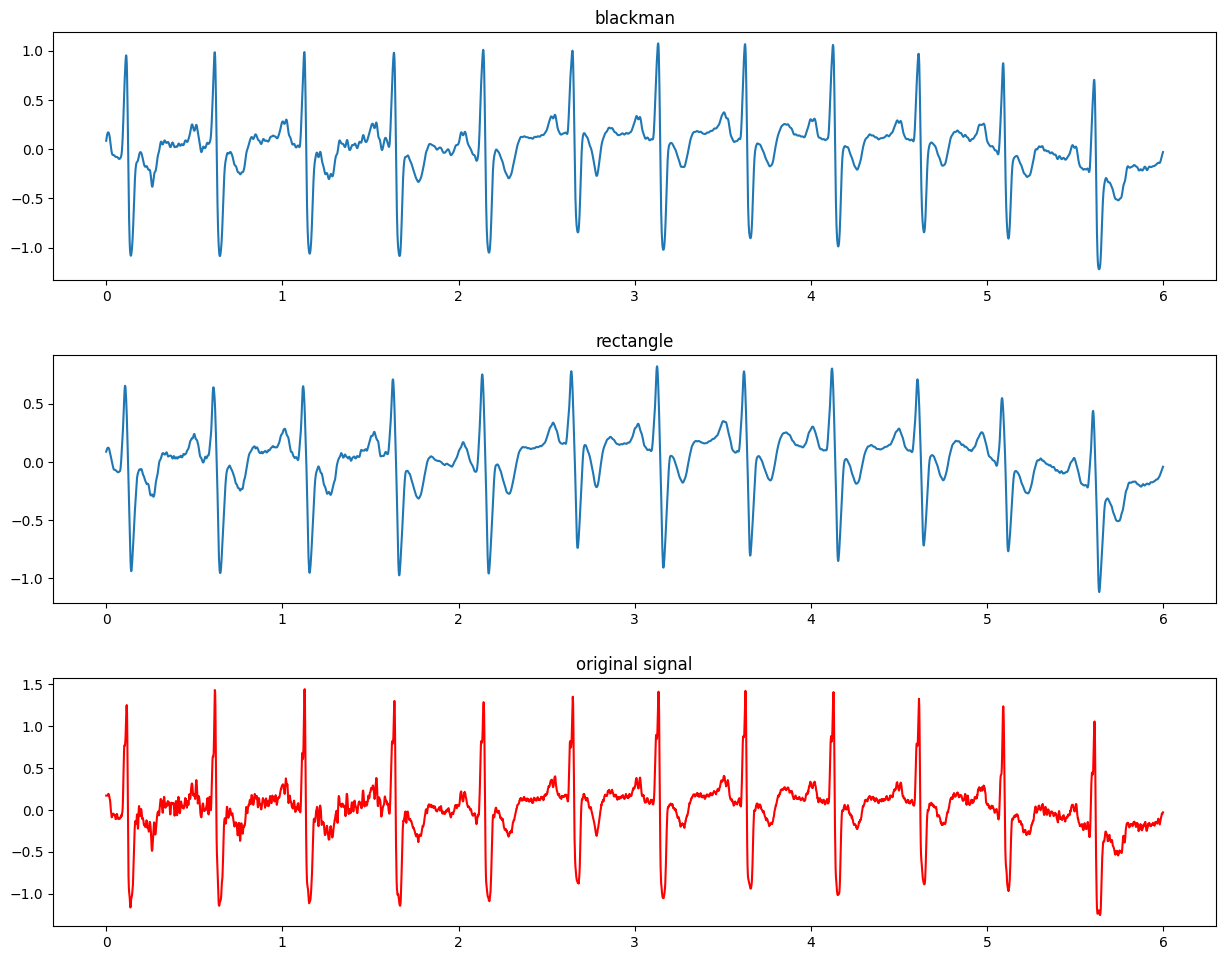

In [20]:
plt.figure(figsize=(15,20))

# plt.subplot(5,1,1)
# plt.gca().set_title("hann")
# plt.plot(df_t, df_hann)

# plt.subplot(5,1,2)
# plt.gca().set_title("hamming")
# plt.plot(df_t, df_hamming)

plt.subplot(5,1,3)
plt.gca().set_title("blackman")
plt.plot(df_t, df_blackman)

plt.subplot(5,1,4)
plt.gca().set_title("rectangle")
plt.plot(df_t, df_rect)

plt.subplot(5,1,5)
plt.gca().set_title("original signal")
plt.plot(df_t, df_amp, color='r')

plt.subplots_adjust(wspace=0.6, hspace=0.3)

- Nhận xét: tín hiệu sau khi nhân với hàm cửa sổ có hình dạng mượt hơn tín hiệu gốc

## Biến đổi sang miền tần số
So sánh phổ tần số của tín hiệu ban đầu với tín hiệu sau khi nhân với hàm cửa sổ

In [21]:
df_hann_spectrum = fourier.fourier_series_spectrum(df_t, df_hann, N_freq, T/2)
df_hamming_spectrum = fourier.fourier_series_spectrum(df_t, df_hamming, N_freq, T/2)
df_blackman_spectrum = fourier.fourier_series_spectrum(df_t, df_blackman, N_freq, T/2)
df_rect_spectrum = fourier.fourier_series_spectrum(df_t, df_rect, N_freq, T/2)

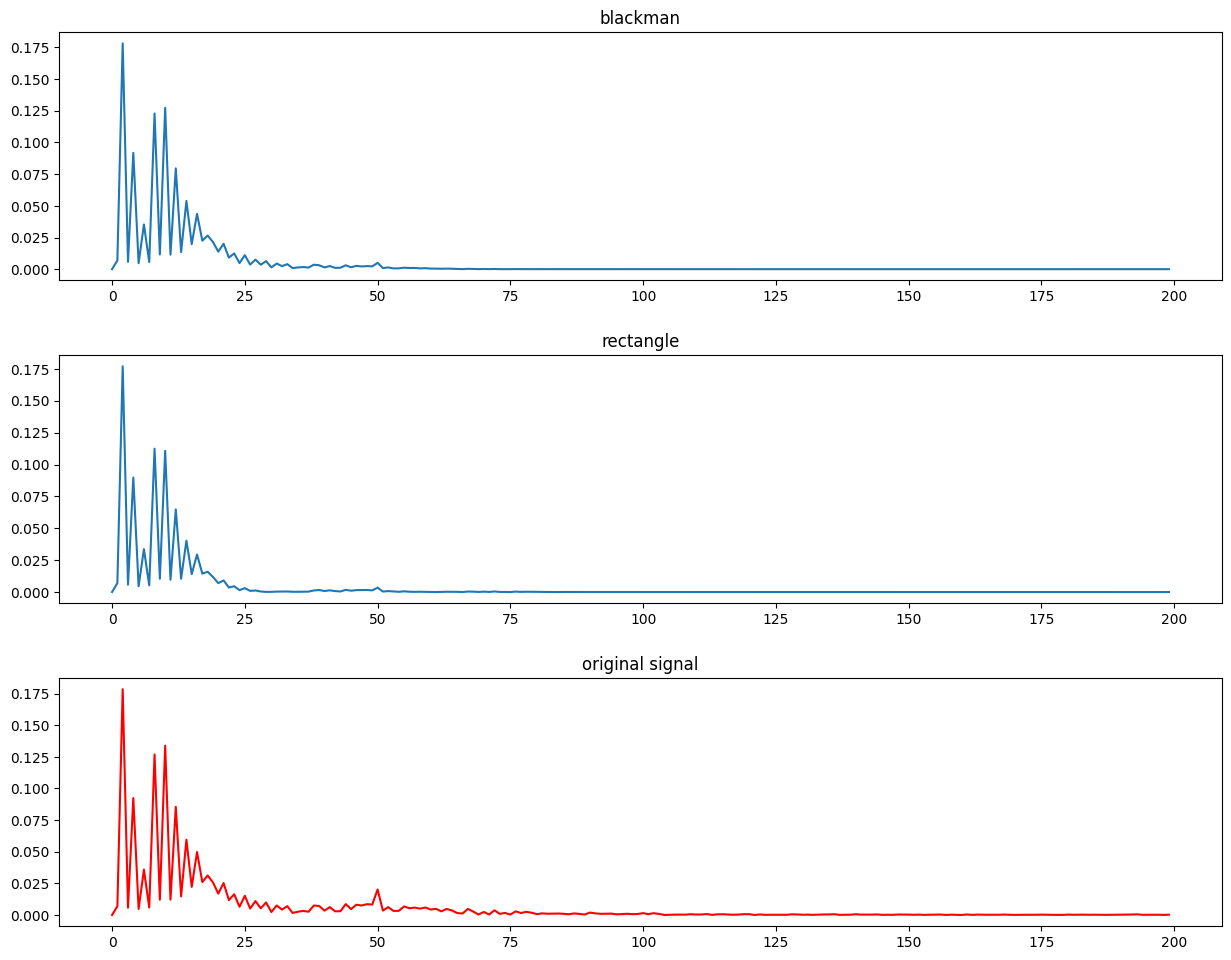

In [22]:
plt.figure(figsize=(15,20))

# plt.subplot(5,1,1)
# plt.gca().set_title("hann")
# plt.plot(F_domain, df_hann_spectrum)

# plt.subplot(5,1,2)
# plt.gca().set_title("hamming")
# plt.plot(F_domain, df_hamming_spectrum)

plt.subplot(5,1,3)
plt.gca().set_title("blackman")
plt.plot(F_domain, df_blackman_spectrum)

plt.subplot(5,1,4)
plt.gca().set_title("rectangle")
plt.plot(F_domain, df_rect_spectrum)

plt.subplot(5,1,5)
plt.gca().set_title("original signal")
plt.plot(F_domain, df_frequency, color='r')

plt.subplots_adjust(wspace=0.6, hspace=0.3)